In [57]:
import pandas as pd
import numpy as np


In [89]:
df = pd.read_csv('car-details-data.csv')

In [90]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [91]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [92]:
#using years we can create an old feature 
df['no_of_years'] = 2021 - df['year']

In [93]:
print(df.columns)

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'no_of_years'],
      dtype='object')


In [94]:
final_dataset = df[['selling_price', 'km_driven', 'fuel',   'seller_type',  'transmission', 'owner','no_of_years']]

In [95]:
final_dataset

,selling_price,km_driven,fuel,seller_type,transmission,owner,no_of_years
0,60000,70000,Petrol,Individual,Manual,First Owner,14
1,135000,50000,Petrol,Individual,Manual,First Owner,14
2,600000,100000,Diesel,Individual,Manual,First Owner,9
3,250000,46000,Petrol,Individual,Manual,First Owner,4
4,450000,141000,Diesel,Individual,Manual,Second Owner,7
...,...,...,...,...,...,...,...
4335,409999,80000,Diesel,Individual,Manual,Second Owner,7
4336,409999,80000,Diesel,Individual,Manual,Second Owner,7
4337,110000,83000,Petrol,Individual,Manual,Second Owner,12
4338,865000,90000,Diesel,Individual,Manual,First Owner,5


In [96]:
final_dataset = pd.get_dummies(final_dataset, drop_first = True)

In [97]:
final_dataset

,selling_price,km_driven,no_of_years,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,60000,70000,14,0,0,0,1,1,0,1,0,0,0,0
1,135000,50000,14,0,0,0,1,1,0,1,0,0,0,0
2,600000,100000,9,1,0,0,0,1,0,1,0,0,0,0
3,250000,46000,4,0,0,0,1,1,0,1,0,0,0,0
4,450000,141000,7,1,0,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,409999,80000,7,1,0,0,0,1,0,1,0,1,0,0
4336,409999,80000,7,1,0,0,0,1,0,1,0,1,0,0
4337,110000,83000,12,0,0,0,1,1,0,1,0,1,0,0
4338,865000,90000,5,1,0,0,0,1,0,1,0,0,0,0


In [98]:
final_dataset.corr()

,selling_price,km_driven,no_of_years,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
selling_price,1.000000,-0.192289,-0.413922,0.282947,-0.005095,-0.042434,-0.269453,-0.236798,0.110176,-0.530205,-0.078725,-0.161986,0.048799,-0.111326
km_driven,-0.192289,1.000000,0.419688,0.285396,-0.001372,0.036652,-0.291139,0.182663,-0.089858,0.120226,0.097349,0.195203,-0.083445,0.194713
no_of_years,-0.413922,0.419688,1.000000,-0.121424,0.025540,0.051266,0.114908,0.173703,-0.100225,0.143800,0.186361,0.292349,-0.095795,0.244308
fuel_Diesel,0.282947,0.285396,-0.121424,1.000000,-0.015063,-0.072422,-0.970934,-0.035314,-0.007911,-0.048098,-0.021054,0.003524,-0.010575,0.009373
fuel_Electric,-0.005095,-0.001372,0.025540,-0.015063,1.000000,-0.001108,-0.014856,-0.026118,-0.002355,-0.044746,-0.002094,0.025960,-0.000952,-0.004166
fuel_LPG,-0.042434,0.036652,0.051266,-0.072422,-0.001108,1.000000,-0.071427,0.035122,-0.011324,0.024764,0.013384,0.030141,-0.004577,0.004836
fuel_Petrol,-0.269453,-0.291139,0.114908,-0.970934,-0.014856,-0.071427,1.000000,0.029845,0.012489,0.039614,0.011502,-0.012717,0.012427,-0.008502
seller_type_Individual,-0.236798,0.182663,0.173703,-0.035314,-0.026118,0.035122,0.029845,1.000000,-0.266904,0.214163,0.072322,0.186573,-0.107886,0.140823
seller_type_Trustmark Dealer,0.110176,-0.089858,-0.100225,-0.007911,-0.002355,-0.011324,0.012489,-0.266904,1.000000,-0.042346,-0.021395,-0.076764,-0.009729,-0.042578
transmission_Manual,-0.530205,0.120226,0.143800,-0.048098,-0.044746,0.024764,0.039614,0.214163,-0.042346,1.000000,0.035597,0.068068,0.009152,0.030802


In [99]:
import seaborn as sns

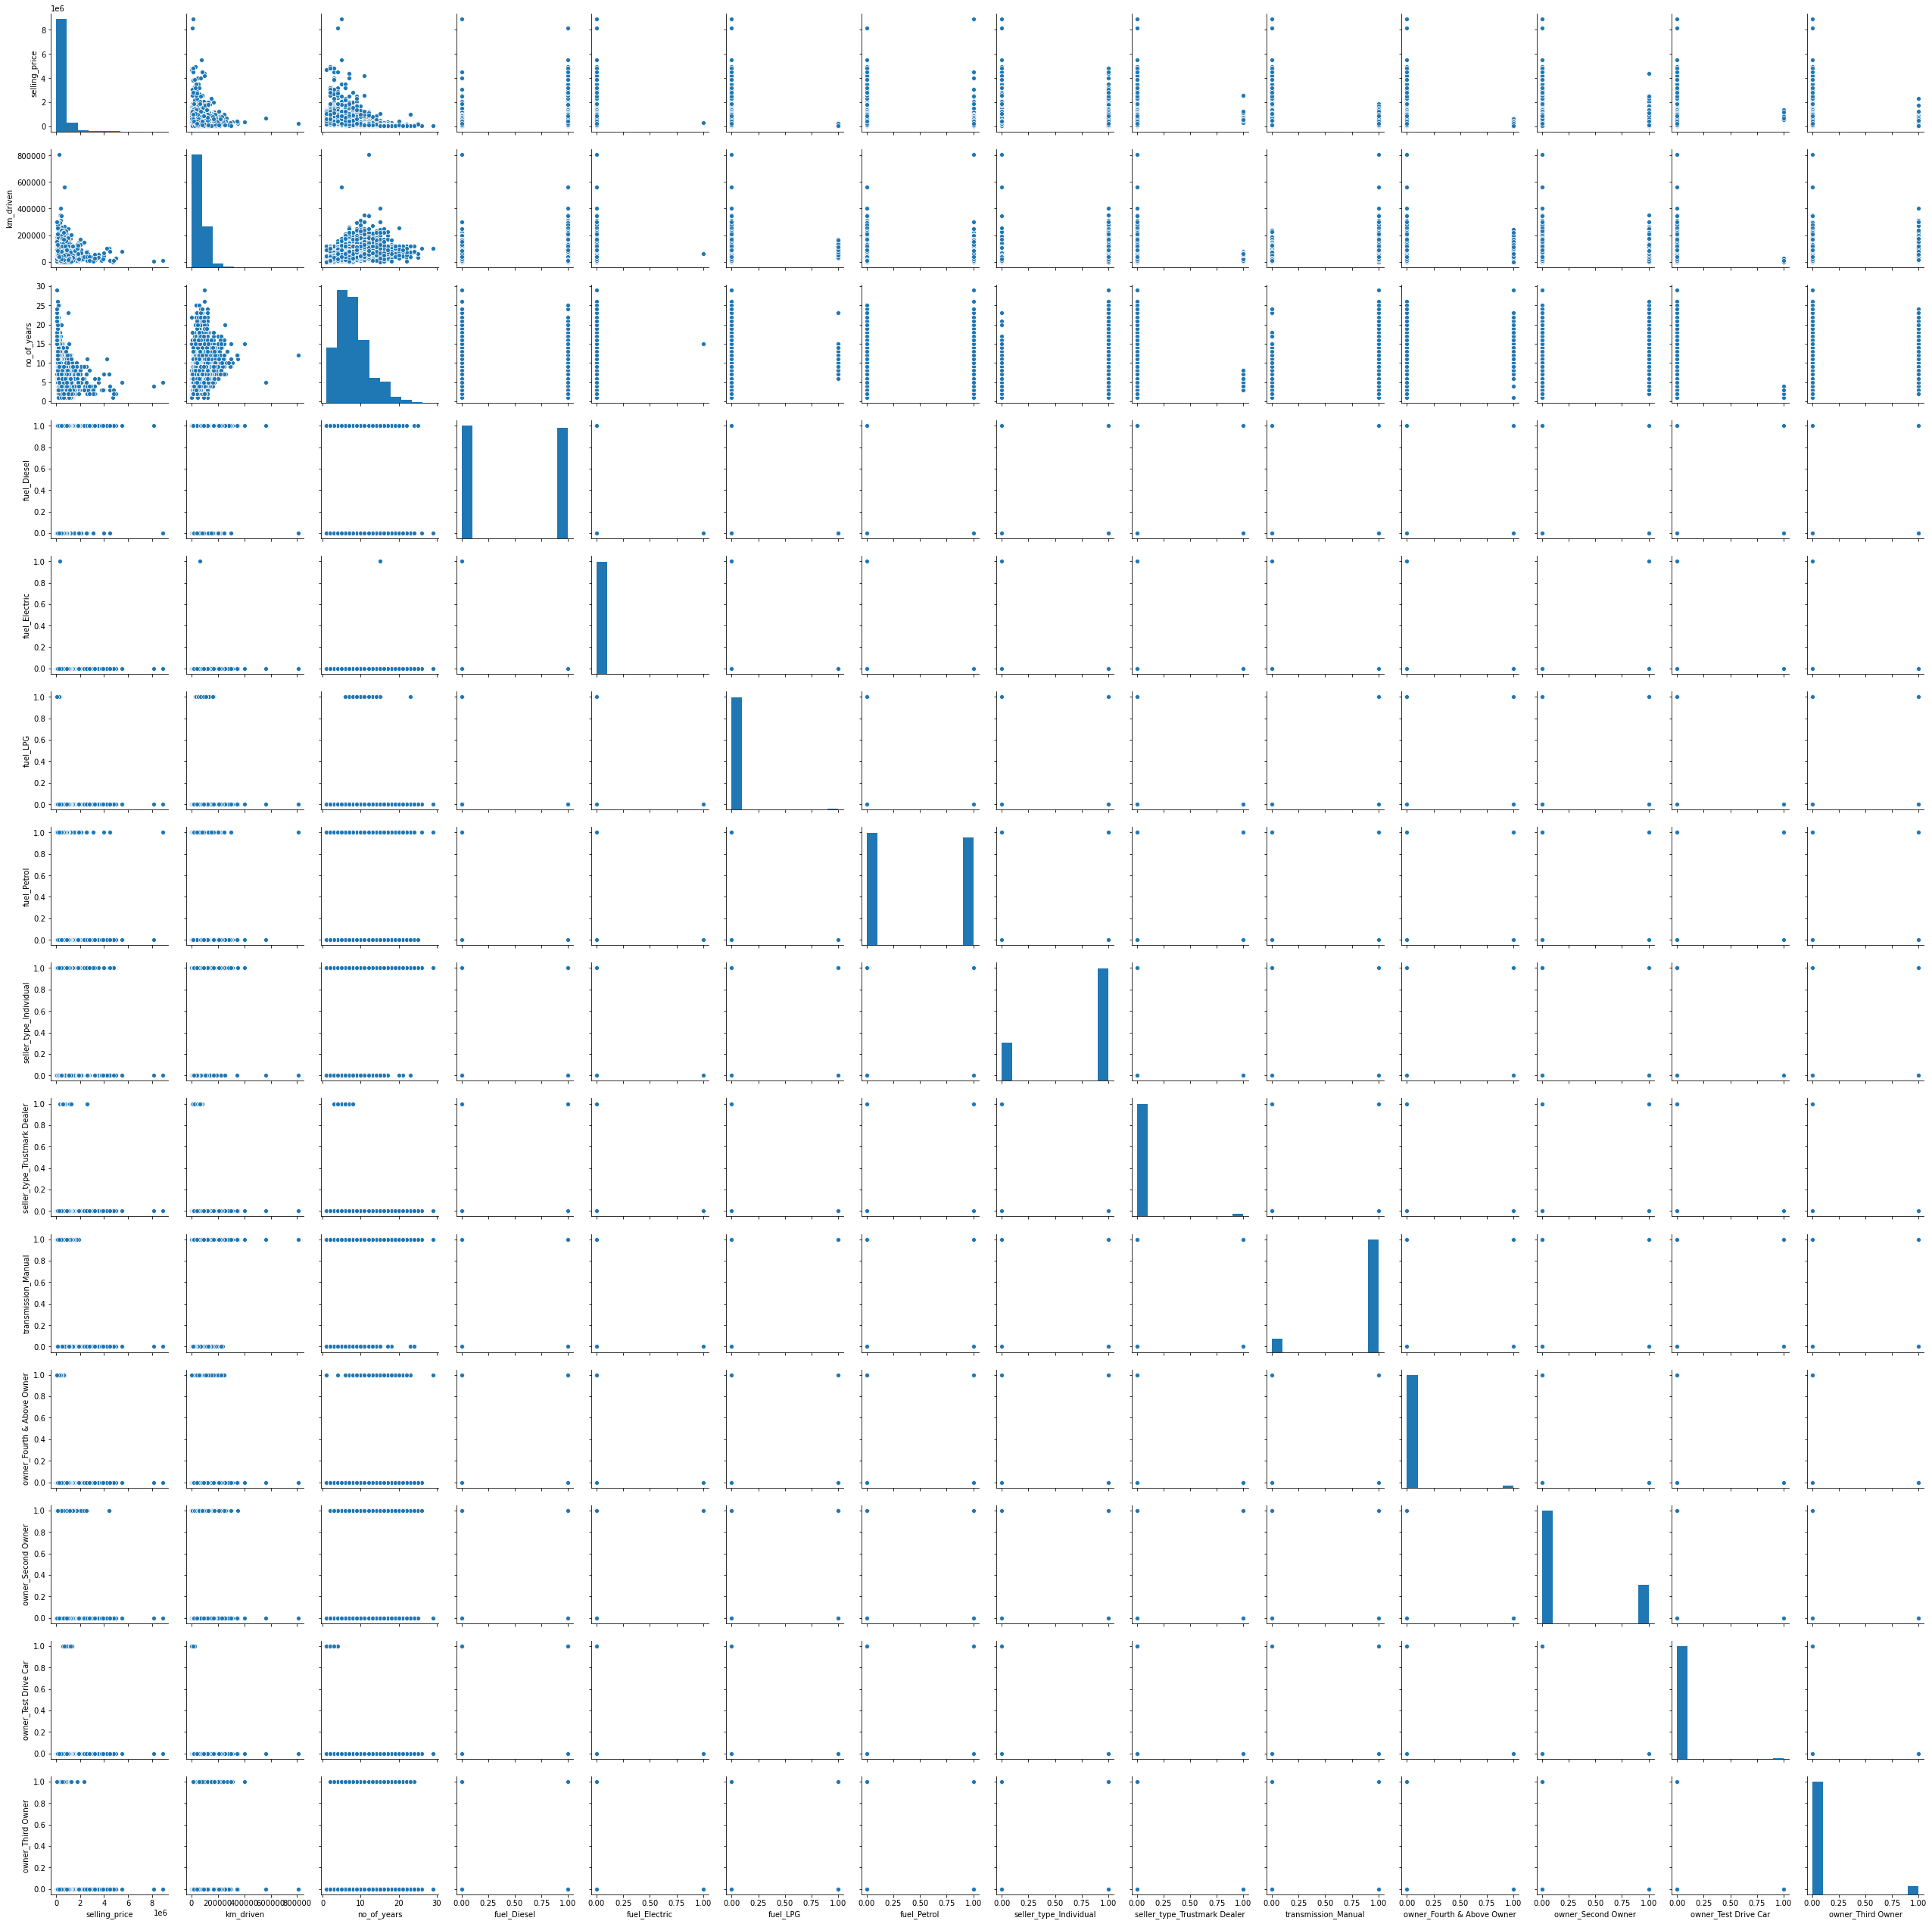

In [101]:
sns.pairplot(final_dataset)

In [102]:
import matplotlib.pyplot as plt
%matplotlib inline

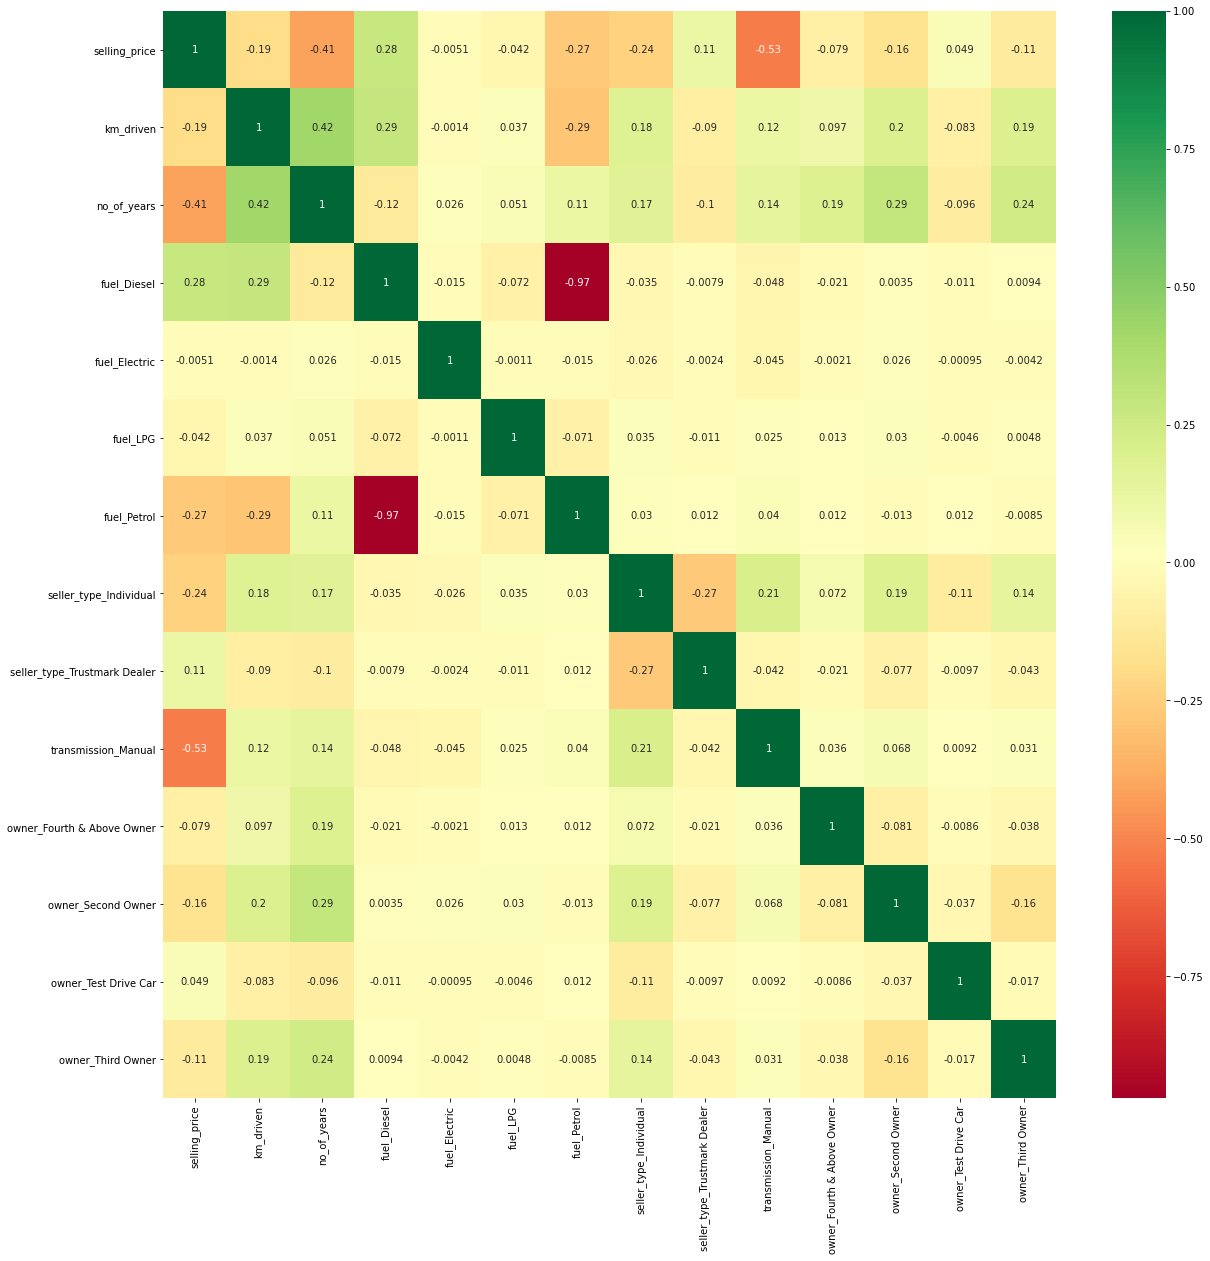

In [103]:
corrmat = final_dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (20, 20))
#plot heatmap
g = sns.heatmap(final_dataset[top_corr_features].corr(), annot=True,cmap="RdYlGn")

In [106]:
X = final_dataset.iloc[: , 1: ]
y = final_dataset.iloc[: , 0]

In [108]:
from sklearn.model_selection import train_test_split

In [118]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state = 10)

In [119]:
X_train.shape, Y_train.shape

((3255, 13), (3255,))

In [120]:
#feature importance
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X, y)

ExtraTreesRegressor()

In [121]:
model.feature_importances_

array([2.48241473e-01, 2.46430360e-01, 1.29713302e-01, 3.18590369e-05,
       2.42348945e-05, 2.09954409e-04, 4.61549077e-02, 8.72356396e-03,
       2.92828084e-01, 7.18428018e-04, 2.21870927e-02, 5.27216336e-04,
       4.20952467e-03])

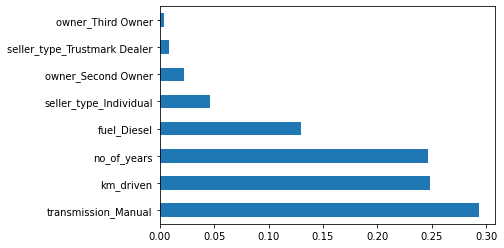

In [122]:
## plotting graph for feature importance 
feat_imp = pd.Series(model.feature_importances_, index = X.columns)
feat_imp.nlargest(8).plot(kind = 'barh')
plt.show()

In [129]:
from sklearn.ensemble import RandomForestRegressor


In [137]:
### Hyperparameters tuning using RandomSearchCV

#no. of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

#number of features in every split
max_features = ['auto', 'sqrt']

#maximum no. of levels in a tree
max_depth  = [int(x) for x in np.linspace(start = 5, stop = 30, num = 6)]

#min no. of samples for a split
min_samples_split = [2, 5, 10, 15, 100]

#min no. of samples req. at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [138]:
from sklearn.model_selection import RandomizedSearchCV

In [139]:
# creating the random grid
random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features, 
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [140]:
rf= RandomForestRegressor()

In [141]:
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, scoring='neg_mean_squared_error', cv = 5, n_iter=10,
    verbose=2, random_state=42)

In [142]:
rf_random.fit(X_train, Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.3s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   1.9s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.9s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.2min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [143]:
predictions = rf_random.predict(X_test)

In [144]:
predictions

array([416825.83010743, 411099.34891505, 193676.55356918, ...,
       228579.54784318, 240806.36844613,  90002.99939611])

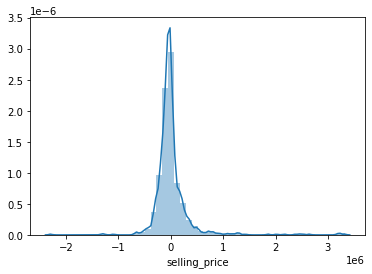

In [145]:
sns.distplot(Y_test - predictions)

In [150]:
import pickle
#open file where you want to store the data
file = open('random_forest_regression_model.pkl', 'wb')

#dump information to that file
pickle.dump(rf_random, file)

In [161]:
X

,km_driven,no_of_years,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,70000,14,0,0,0,1,1,0,1,0,0,0,0
1,50000,14,0,0,0,1,1,0,1,0,0,0,0
2,100000,9,1,0,0,0,1,0,1,0,0,0,0
3,46000,4,0,0,0,1,1,0,1,0,0,0,0
4,141000,7,1,0,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,80000,7,1,0,0,0,1,0,1,0,1,0,0
4336,80000,7,1,0,0,0,1,0,1,0,1,0,0
4337,83000,12,0,0,0,1,1,0,1,0,1,0,0
4338,90000,5,1,0,0,0,1,0,1,0,0,0,0


In [163]:
df.seller_type.unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)